## Mobile Price Classification

## Importing toolkit

In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay , classification_report
from sklearn.model_selection import train_test_split

## Data preparation

In [2]:
df_train = pd.read_csv("train.csv")
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
battery_power,842.0,1021.0,563.0,615.0,1821.0,1859.0,1821.0,1954.0,1445.0,509.0,...,1617.0,1882.0,674.0,1467.0,858.0,794.0,1965.0,1911.0,1512.0,510.0
blue,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
clock_speed,2.2,0.5,0.5,2.5,1.2,0.5,1.7,0.5,0.5,0.6,...,2.4,2.0,2.9,0.5,2.2,0.5,2.6,0.9,0.9,2.0
dual_sim,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
fc,1.0,0.0,2.0,0.0,13.0,3.0,4.0,0.0,0.0,2.0,...,8.0,11.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0,5.0
four_g,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
int_memory,7.0,53.0,41.0,10.0,44.0,22.0,10.0,24.0,53.0,9.0,...,36.0,44.0,21.0,18.0,50.0,2.0,39.0,36.0,46.0,45.0
m_dep,0.6,0.7,0.9,0.8,0.6,0.7,0.8,0.8,0.7,0.1,...,0.8,0.8,0.2,0.6,0.1,0.8,0.2,0.7,0.1,0.9
mobile_wt,188.0,136.0,145.0,131.0,141.0,164.0,139.0,187.0,174.0,93.0,...,85.0,113.0,198.0,122.0,84.0,106.0,187.0,108.0,145.0,168.0
n_cores,2.0,3.0,5.0,6.0,2.0,1.0,8.0,4.0,7.0,5.0,...,1.0,8.0,3.0,5.0,1.0,6.0,4.0,8.0,5.0,6.0


## Data Exploration

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
df_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

## We want to calculate the relative frequencies of the classes

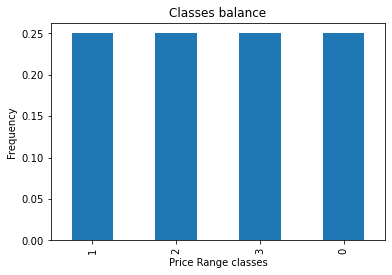

In [6]:
df_train['price_range'].value_counts(normalize= True).plot(kind = 'bar')
plt.xlabel("Price Range classes")
plt.ylabel("Frequency")
plt.title("Classes balance");

## Now we show the correlation of the "Ram & Battery Power" column for both groups in the "Price Range" column

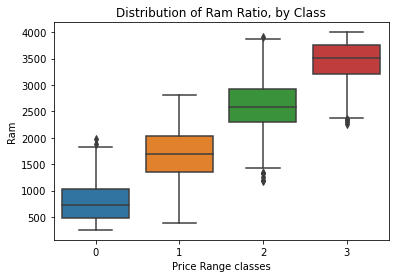

In [7]:
sns.boxplot(x='price_range' , y='ram' , data=df_train)
plt.xlabel("Price Range classes")
plt.ylabel("Ram")
plt.title("Distribution of Ram Ratio, by Class");

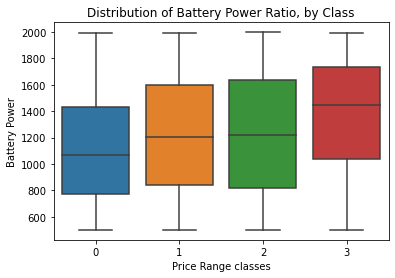

In [8]:
sns.boxplot(x='price_range' , y='battery_power' , data=df_train)
plt.xlabel("Price Range classes")
plt.ylabel("Battery Power")
plt.title("Distribution of Battery Power Ratio, by Class");

## 3G Supported phones

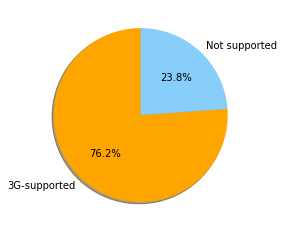

In [9]:
labels = ["3G-supported",'Not supported']
values = df_train['three_g'].value_counts().values
fig, ax = plt.subplots()
colors = ['orange', 'lightskyblue']
ax.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show();

## 4G supported phones  

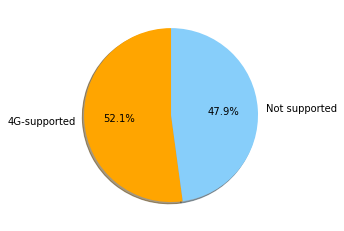

In [10]:
labels = ["4G-supported",'Not supported']
values = df_train['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['orange', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show();

# Multicollinearity

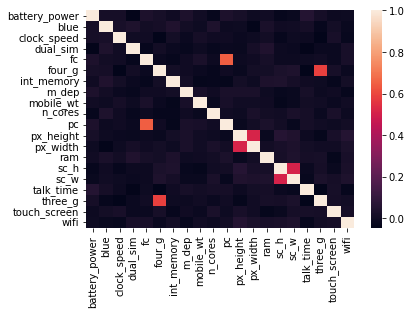

In [11]:
corr = df_train.drop(columns='price_range').corr()
sns.heatmap(corr);

## Split

In [12]:
target = 'price_range'
X = df_train.drop(columns= [target])
y= df_train[target]
print(f"X Shape {X.shape}")
print(f"y Shape {y.shape}")

X Shape (2000, 20)
y Shape (2000,)


### Scale and Normalize Data

In [13]:
scalar = MinMaxScaler()

In [14]:
features = X.columns
X = scalar.fit_transform(X)

In [15]:
print(X)

[[0.22778891 0.         0.68       ... 0.         0.         1.        ]
 [0.34736139 1.         0.         ... 1.         1.         0.        ]
 [0.04141617 1.         0.         ... 1.         1.         0.        ]
 ...
 [0.94188377 0.         0.16       ... 1.         1.         0.        ]
 [0.6753507  0.         0.16       ... 1.         1.         1.        ]
 [0.00601202 1.         0.6        ... 1.         1.         1.        ]]


In [16]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

In [17]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 20)
y_train shape: (1600,)
X_test shape: (400, 20)
y_test shape: (400,)


## Iterate

## 1-Logistic Regression

In [18]:
model_lr = LogisticRegression(max_iter=1000)

### Training model

In [19]:
model_lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [20]:
training_acc_lr= model_lr.score(X_train , y_train)
print(f"Training accuracy: {training_acc_lr}")

Training accuracy: 0.938125


## Evaluate Logistic Regression model

In [21]:
testing_acc_lr= model_lr.score(X_test , y_test)
print(f"Testing accuracy: {testing_acc_lr}")

Testing accuracy: 0.94


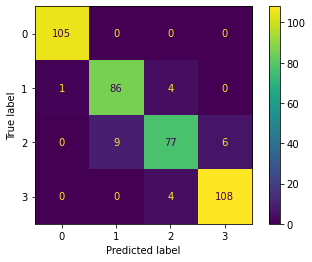

In [22]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(
    model_lr,
    X_test,
    y_test
);

## 2-SVM

In [23]:
model_svc= SVC()

### Training model

In [24]:
model_svc.fit(X_train, y_train)

SVC()

In [25]:
training_acc_svc = model_svc.score(X_train , y_train)
print(f"Testing accuracy: {training_acc_svc}")

Testing accuracy: 0.969375


## Evaluate SVM model

In [26]:
testing_acc_svc= model_svc.score(X_test , y_test)
print(f"Testing accuracy: {testing_acc_svc}")

Testing accuracy: 0.8625


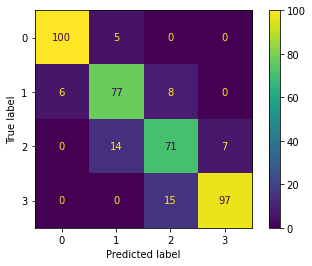

In [27]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(
    model_svc,
    X_test,
    y_test
);

In [28]:
models = pd.DataFrame({
    
    "Models": ["Logestic Regression" , "SVM"],
    "Score":[testing_acc_lr , testing_acc_svc]
    
})
models.sort_values(by="Score" , ascending=False)

,Models,Score
0,Logestic Regression,0.9400
1,SVM,0.8625


## plot a bar char to show the best model performance

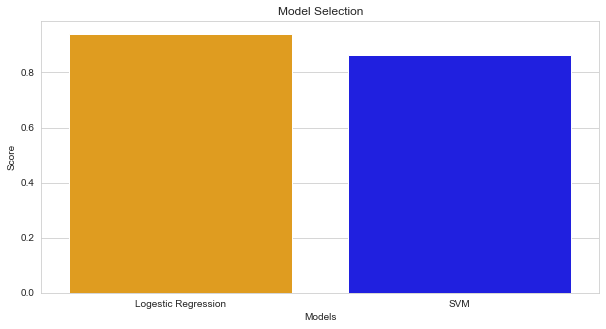

In [29]:
colors= ['orange' , 'blue']
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
sns.barplot(x=models['Models'],y=models['Score'], palette=colors )
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Selection")
plt.show();

### Logistic Regression got the highest accuracy

## Communication

In [30]:
# Extract importances from model
importances = model_lr.coef_[0]

odds_ratios = pd.Series(np.exp(importances) , index = features).sort_values()
odds_ratios.head()

ram              7.023289e-07
battery_power    3.356091e-02
px_height        7.997937e-02
px_width         1.317819e-01
int_memory       8.198506e-01
dtype: float64

## Horizontal bar chart, five largest coefficients

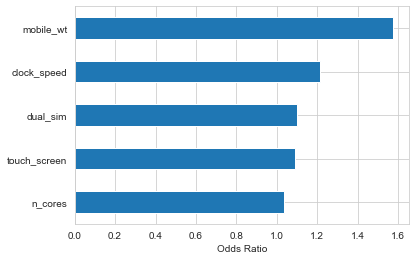

In [31]:
odds_ratios.tail().plot(kind= 'barh')
plt.xlabel("Odds Ratio");

## Horizontal bar chart, five smallest coefficients

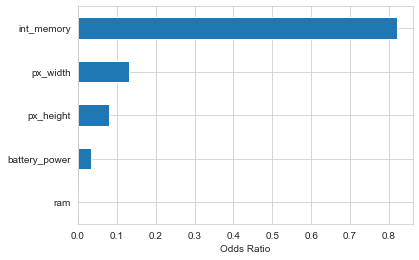

In [32]:
odds_ratios.head().plot(kind= 'barh')
plt.xlabel("Odds Ratio");

## Thanks!